In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

In [3]:
list(df19.columns)

['CBSA',
 'NAME',
 'geometry',
 'LSAD',
 'metro',
 'micro',
 'inBuff',
 'commuteBuffCount',
 'workingPop',
 'commutePercent',
 'liminal',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10',
 'POPESTIMATE',
 'NPOPCHG_',
 'BIRTHS',
 'DEATHS',
 'NATURALINC',
 'INTERNATIONALMIG',
 'DOMESTICMIG',
 'NETMIG',
 'RESIDUAL',
 'GQESTIMATES',
 'RBIRTH',
 'RDEATH',
 'RNATURALINC',
 'RINTERNATIONALMIG',
 'RDOMESTICMIG',
 'RNETMIG',
 'RBIRTHSw',
 'RDEATHSw',
 'RNATURALINCw',
 'RINTERNATIONALMIGw',
 'RDOMESTICMIGw',
 'RNETMIGw',
 'avg_d_kbps',
 'avg_u_kbps',
 'avg_lat_ms',
 'tests',
 'devices',
 'Annual Change (%)',
 'HPI',
 'HPI with 1990 base',
 'HPI with 2000 base',
 'Total_Population',
 'Total_Male_Pop',
 'Total_Female_Pop',
 'Median_Age',
 'M_Median_Age',
 'F_Median_Age',
 'Race_w

In [4]:
outcomeVars = [
    'RINTERNATIONALMIGw',
    'RDOMESTICMIGw',
    'Median_Income',
    'Pct_HS_Above',
    'Pct_BS_Above',
    'Tot_Units',
]

explainVars = [
    'commutePercent',
    'Median AQI',
    'POPESTIMATE',
    'avg_d_kbps',
    'HPI with 2000 base',
    'Median_Age',
]

allVars = outcomeVars + explainVars

In [5]:
df19[df19['liminal']][allVars]

,RINTERNATIONALMIGw,RDOMESTICMIGw,Median_Income,Pct_HS_Above,Pct_BS_Above,Tot_Units,commutePercent,Median AQI,POPESTIMATE,avg_d_kbps,HPI with 2000 base,Median_Age
5,0.416745,-8.074441,39859.0,0.877841,0.225900,120.0,8.103162,NaN,76450,86135.767749,171.45,42.9
9,3.118685,-8.981812,37652.0,0.876402,0.221783,119.0,10.421564,NaN,40040,70648.946386,138.43,38.8
15,0.372885,-0.326274,38811.0,0.909152,0.241032,150.0,6.389467,35.0,64420,85581.484076,155.23,41.1
16,0.000000,6.608552,40022.0,0.897708,0.180245,295.0,36.521301,NaN,46221,58870.591645,154.72,39.8
19,1.429316,-4.770826,35171.0,0.903882,0.284744,16.0,37.691695,NaN,51665,73307.915304,161.99,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.414916,-4.460350,37648.0,0.876561,0.247879,37.0,13.464614,14.0,28913,48110.671197,181.69,31.4
916,4.349495,-1.418819,36257.0,0.890158,0.232564,145.0,12.785490,NaN,43137,69393.130452,161.39,39.3
918,0.618157,-3.209662,37178.0,0.883434,0.189181,56.0,37.469010,43.0,42002,97974.407996,128.31,39.4
919,0.563826,4.142893,31785.0,0.802717,0.196436,181.0,16.450466,NaN,81775,90763.130836,122.77,40.5


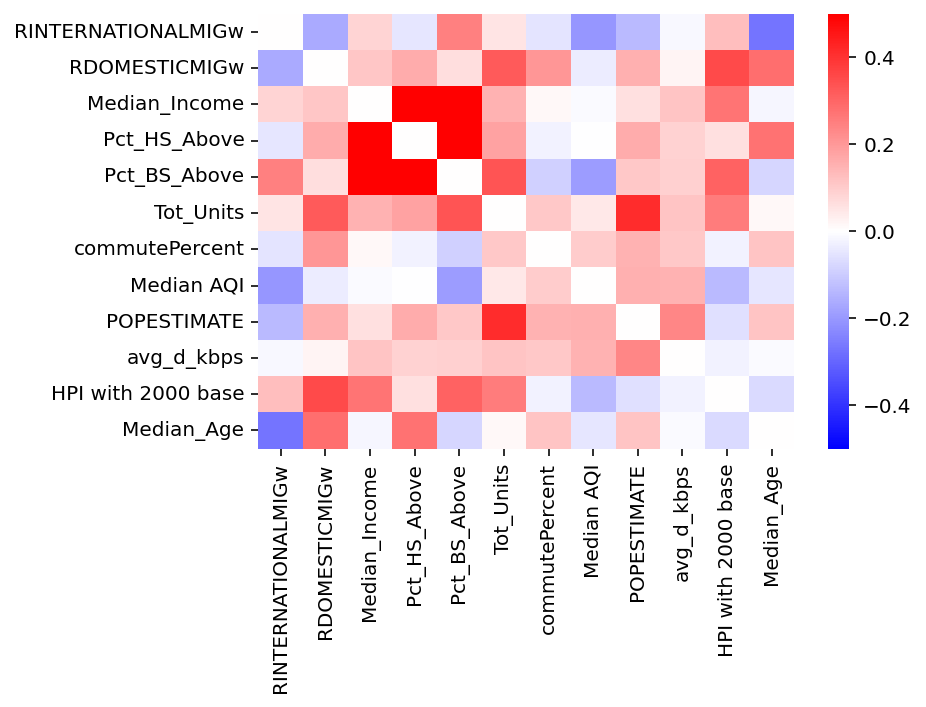

In [6]:
corr = df19[df19['micro']][allVars].corr()
np.fill_diagonal(corr.values, 0)
sb.heatmap(corr, cmap='bwr', vmin=-0.5, vmax=0.5);